# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

# Cleaning the dataset

## Importing the dataset

In [2]:
chocoRaw = pd.read_csv('chocolate.csv')
chocoTaste = pd.read_csv('chocolate_taste_dataset.csv')

## Examining basic infos 

In [3]:
chocoRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company                           2224 non-null   object 
 3   company_location                  2224 non-null   object 
 4   review_date                       2224 non-null   int64  
 5   country_of_bean_origin            2224 non-null   object 
 6   specific_bean_origin_or_bar_name  2224 non-null   object 
 7   cocoa_percent                     2224 non-null   float64
 8   rating                            2224 non-null   float64
 9   counts_of_ingredients             2224 non-null   int64  
 10  beans                             2224 non-null   object 
 11  cocoa_butter                      2224 non-null   object 
 12  vanill

In [4]:
chocoTaste

,taste,count_of_taste
0,nutty,238
1,sweet,237
2,cocoa,203
3,roasty,198
4,creamy,184
...,...,...
835,fudgey then spicy,1
836,ligt color,1
837,light brown,1
838,mild cacao and fruit notes,1


## Dropping redundant columns

Some columns such as "ref", "company", "review_date" or "company_location" are variables that can not be controlled when creating a chocolate bar, which should be removed. "specific_bean_origin_or_bar_name" is also removed because it is too specific, and there are too many minority variables.

In [5]:
choc = pd.DataFrame(chocoRaw.drop(columns=['Unnamed: 0', 'ref', 'company', 'company_location', 'review_date', 'beans', 'specific_bean_origin_or_bar_name']))

## Filling NaN values in taste columns with "no taste"

In [ ]:
choc.fillna("no taste",inplace = True)

## Changing the values of ingredients to integer

We replaced the values in the ingredients columns to cater to future machine learning model usage.
- "have" changed into 1
- "not_have" changed into 0

In [6]:
choc['cocoa_butter'] = choc['cocoa_butter'].replace('have_cocoa_butter' ,'1')
choc['cocoa_butter'] = choc['cocoa_butter'].replace('have_not_cocoa_butter' ,'0')
choc['cocoa_butter'] = choc['cocoa_butter'].astype('category')
choc['vanilla'] = choc['vanilla'].replace('have_vanila' ,'1')
choc['vanilla'] = choc['vanilla'].replace('have_not_vanila' ,'0')
choc['vanilla'] = choc['vanilla'].astype('category')
choc['lecithin'] = choc['lecithin'].replace('have_lecithin' ,'1')
choc['lecithin'] = choc['lecithin'].replace('have_not_lecithin' ,'0')
choc['lecithin'] = choc['lecithin'].astype('category')
choc['salt'] = choc['salt'].replace('have_salt' ,'1')
choc['salt'] = choc['salt'].replace('have_not_salt' ,'0')
choc['salt'] = choc['salt'].astype('category')
choc['sugar'] = choc['sugar'].replace('have_sugar' ,'1')
choc['sugar'] = choc['sugar'].replace('have_not_sugar' ,'0')
choc['sugar'] = choc['sugar'].astype('category')
choc['sweetener_without_sugar'] = choc['sweetener_without_sugar'].replace('have_sweetener_without_sugar' ,'1')
choc['sweetener_without_sugar'] = choc['sweetener_without_sugar'].replace('have_not_sweetener_without_sugar' ,'0')
choc['sweetener_without_sugar'] = choc['sweetener_without_sugar'].astype('category')

Seeing the proportion of each ingredients

In [7]:
print("cocoa butter:")
print(choc["cocoa_butter"].value_counts())
print()
print("vanilla:")
print(choc["vanilla"].value_counts())
print()
print("lecithin:")
print(choc["lecithin"].value_counts())
print()
print("salt:")
print(choc["salt"].value_counts())
print()
print("sugar:")
print(choc["sugar"].value_counts())
print()
print("sweetener w/o sugar:")
print(choc["sweetener_without_sugar"].value_counts())

cocoa butter:
1    1535
0     689
Name: cocoa_butter, dtype: int64

vanilla:
0    1876
1     348
Name: vanilla, dtype: int64

lecithin:
0    1745
1     479
Name: lecithin, dtype: int64

salt:
0    2187
1      37
Name: salt, dtype: int64

sugar:
1    2142
0      82
Name: sugar, dtype: int64

sweetener w/o sugar:
0    2148
1      76
Name: sweetener_without_sugar, dtype: int64


## Reclassifying rating 

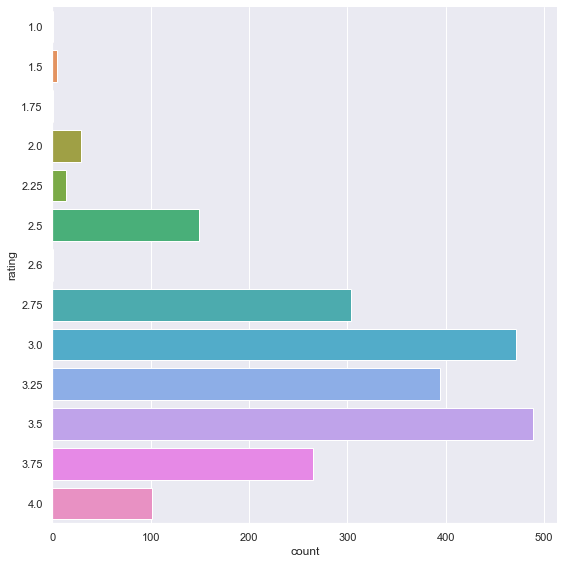

In [8]:
rating = pd.DataFrame(choc['rating'])
sb.catplot(y = "rating", data = rating, kind = "count", height = 8)

As we can see, the rating data are too imbalanced, with a heavy skew towards the higher rating. Therefore, we reclassify them into 3 categories, which helps with reducing class imbalance, without too much oversampling or downscaling:
- rating <= 2.75: "low"
- 2.75 < rating <= 3.25: "mid"
- 3.25 < rating <= 4: "high"<br>

Once again, we assign numerical values to the new ratings:
- "high" = 2
- "mid" = 1
- "low" = 0

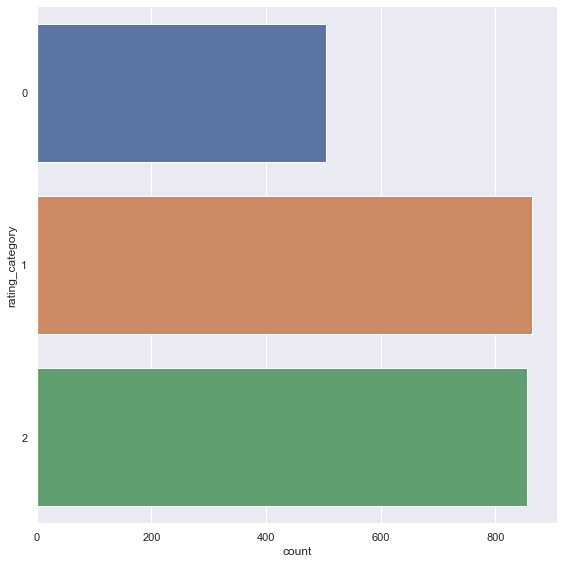

In [9]:
conditions = [(choc['rating'] <= 2.75),
              (choc['rating'] > 2.75) & (choc['rating'] <= 3.25),
              (choc['rating'] > 3.25) & (choc['rating'] <= 4)]

values = ['0', '1', '2']

choc['rating_category'] = np.select(conditions, values)
swap = choc.pop('rating_category')
choc.insert(3,'rating_category', swap)
choc['rating_category'] = choc['rating_category'].astype('category')

sb.catplot(y = 'rating_category', data = choc, kind = 'count', height = 8)

The different ratings are now much more balanced.

## Adding "number_of_taste" column

There are data on number of ingredients, so we believe there should be data on number of taste as well.

In [10]:
choc['number_of_taste'] = choc.apply(lambda row: 4 - sum(row[0:2223]=='no taste'), axis = 1).astype('category')
choc

,country_of_bean_origin,cocoa_percent,rating,rating_category,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,number_of_taste
0,Madagascar,76.0,3.75,2,3,1,0,0,0,1,0,cocoa,blackberry,full body,NaN,4
1,Dominican republic,76.0,3.50,2,3,1,0,0,0,1,0,cocoa,vegetal,savory,NaN,4
2,Tanzania,76.0,3.25,1,3,1,0,0,0,1,0,rich cocoa,fatty,bready,NaN,4
3,Peru,63.0,3.75,2,4,1,0,1,0,1,0,fruity,melon,roasty,NaN,4
4,Bolivia,70.0,3.50,2,4,1,0,1,0,1,0,vegetal,nutty,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Blend,80.0,2.75,0,4,1,0,0,1,0,1,waxy,cloying,vegetal,NaN,4
2220,Colombia,75.0,3.75,2,3,1,0,0,0,1,0,strong nutty,marshmallow,NaN,NaN,4
2221,Belize,72.0,3.50,2,3,1,0,0,0,1,0,muted,roasty,accessible,NaN,4
2222,Congo,70.0,3.25,1,3,1,0,0,0,1,0,fatty,mild nuts,mild fruit,NaN,4


In [11]:
choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country_of_bean_origin   2224 non-null   object  
 1   cocoa_percent            2224 non-null   float64 
 2   rating                   2224 non-null   float64 
 3   rating_category          2224 non-null   category
 4   counts_of_ingredients    2224 non-null   int64   
 5   cocoa_butter             2224 non-null   category
 6   vanilla                  2224 non-null   category
 7   lecithin                 2224 non-null   category
 8   salt                     2224 non-null   category
 9   sugar                    2224 non-null   category
 10  sweetener_without_sugar  2224 non-null   category
 11  first_taste              2224 non-null   object  
 12  second_taste             2147 non-null   object  
 13  third_taste              1604 non-null   object  
 14  fourth_t

In [12]:
choc.to_csv('cleaned_chocolate.csv')